In [2]:
import os
import xarray as xr
import xgcm
from matplotlib import pyplot as plt
from mlpython.utils import compute_diss
plt.style.use('../grl.mplstyle')
import numpy as np

In [3]:
# Specify the directory path
base_dir = "/Users/jiarongw/Data/multilayer_data/JPO2024/processed/"

paths = []
# Iterate through all folders
for item in os.listdir(base_dir):
    full_path = os.path.join(base_dir, item)
    paths.append(full_path)

paths

['/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C4_NL30',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/.DS_Store',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C4_rand4',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C1',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/tests',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/Case1',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C5_rand4',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/breaking_hist.nc',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C3',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C4',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C5',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C2',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C4_NL45']

In [5]:
# tlist = np.array([110,130,150,170])
tlist = np.array([110,130])
filelist = [paths[0] + f'/field{t}.nc' for t in tlist]
ds = xr.open_mfdataset(filelist, concat_dim='t', combine='nested')
ds = ds.assign_coords(t=tlist)
ds = compute_diss(ds).compute()

Colorbar-like object skipped
Colorbar-like object skipped


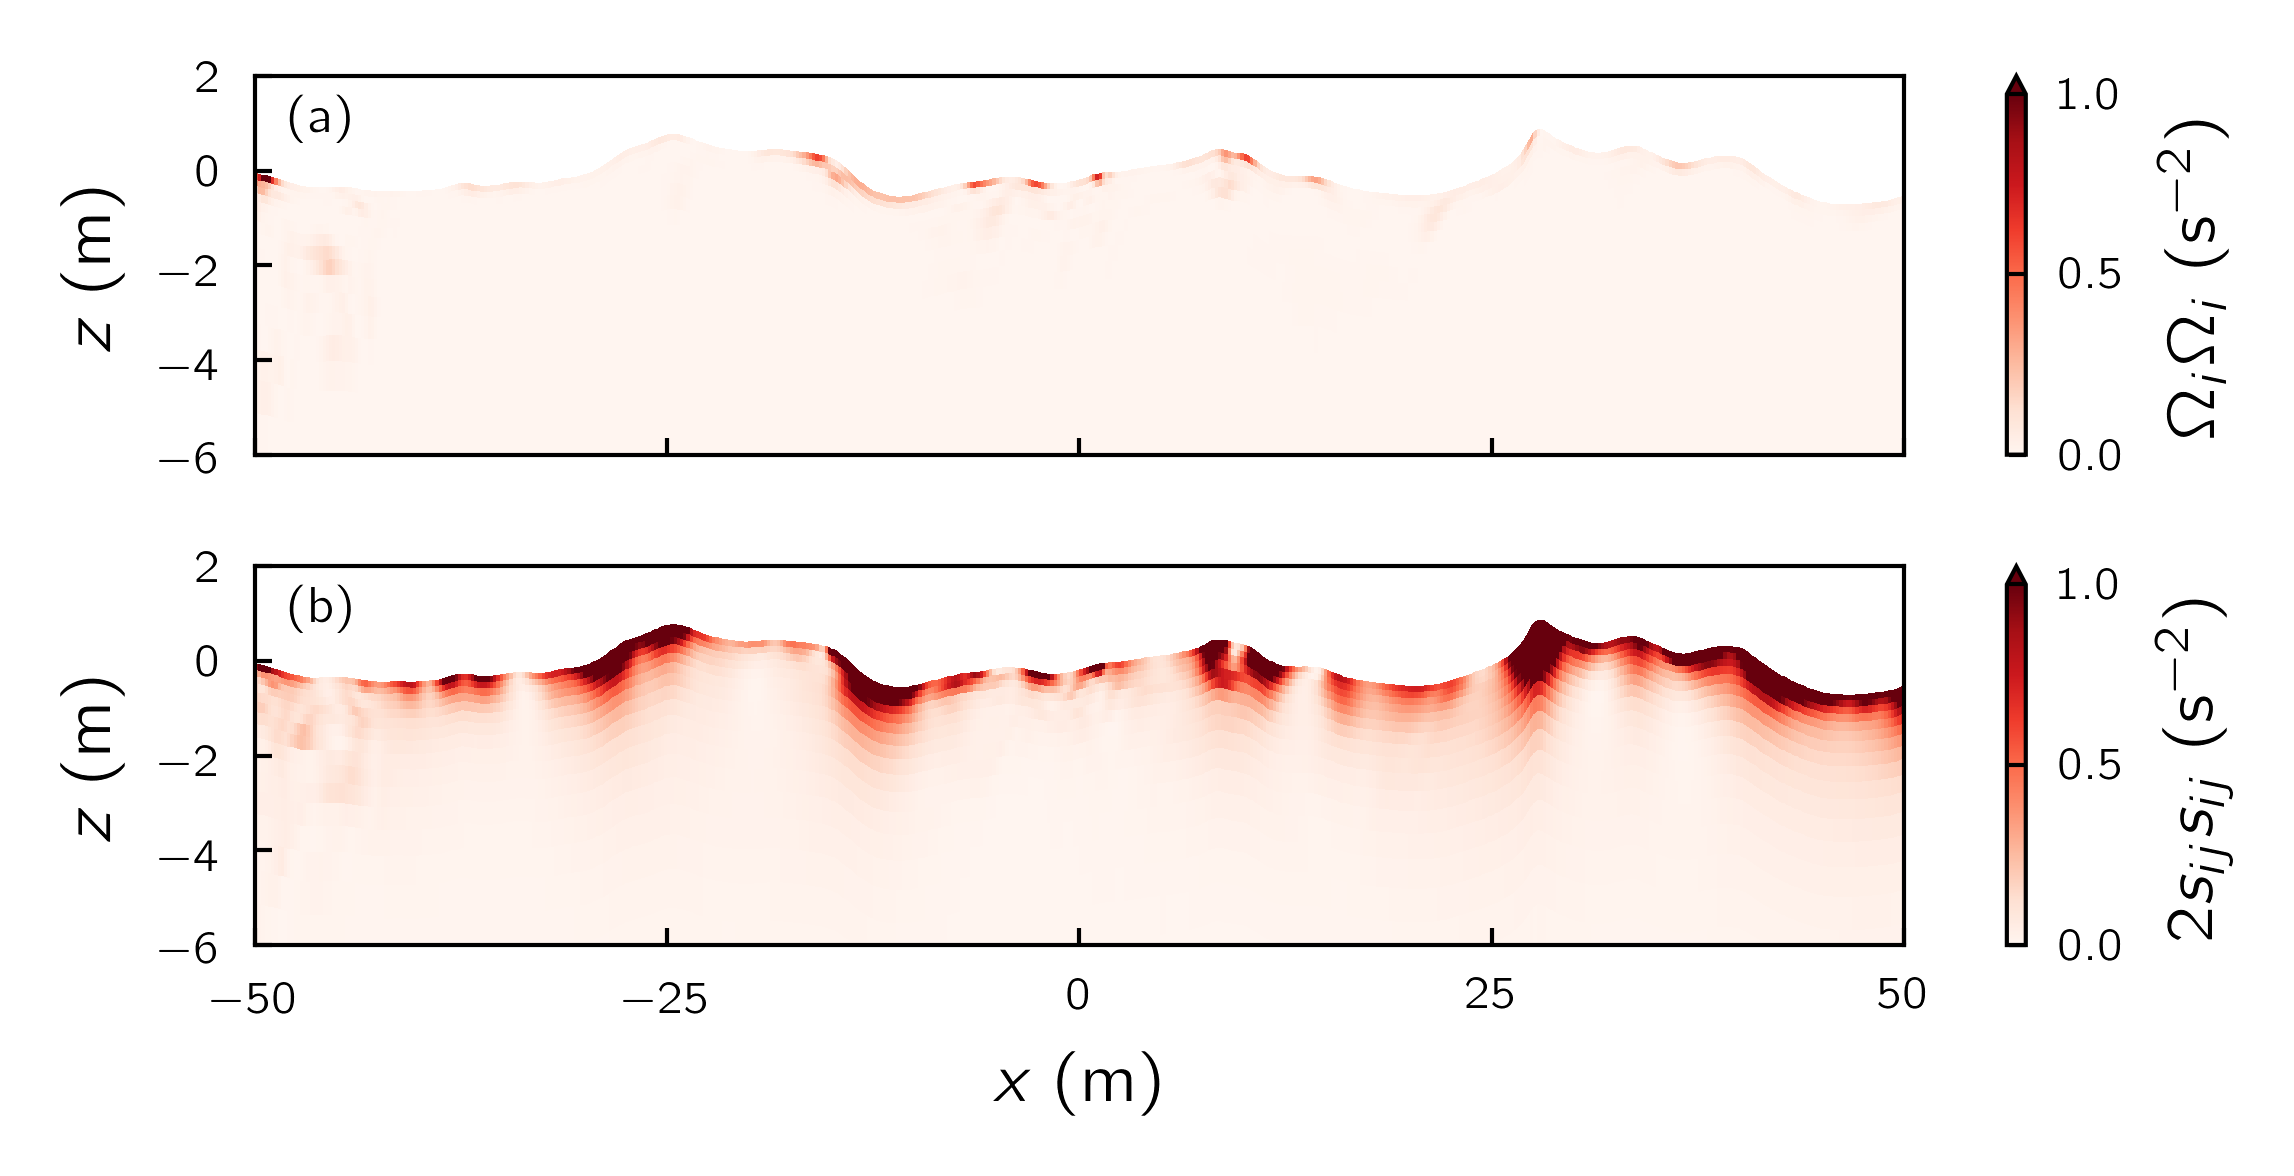

In [18]:
fig, axes = plt.subplots(2, 1, figsize=[4,2], sharex=True)
from mlpython.plot import set_letters

ds.vort2.isel(t=0,y=512).plot(x='x', y='z', ax=axes[0], vmax=1, vmin=0, cmap='Reds', 
                              cbar_kwargs={'label': r'$\Omega_{i}\Omega_{i} \; \mathrm{(s^{-2})}$'}, rasterized=True)
ds.epsilon.isel(t=0,y=512).plot(x='x', y='z', ax=axes[1], vmax=1, vmin=0, cmap='Reds', 
                                cbar_kwargs={'label': r'$2s_{ij}s_{ij} \; \mathrm{(s^{-2})}$'}, rasterized=True)
axes[0].set_ylim([-6,2]); axes[1].set_ylim([-6,2])
axes[1].set_xlim([-50,50]); axes[1].set_xticks([-50,-25,0,25,50])
axes[0].set_title(''); axes[1].set_title('')
axes[0].set_ylabel('$z \; (\mathrm{m})$'); axes[1].set_ylabel('$z \; (\mathrm{m})$')
axes[1].set_xlabel('$x \; (\mathrm{m})$'); axes[0].set_xlabel('')

set_letters(x=0.02, y=0.85, fontsize=6)
plt.tight_layout()
fig.savefig('../jpo2024/plots/Omega_vs_sij.pdf', bbox_inches='tight')